### Fourier Series
The FFT is a fast, $\mathcal{O}[N\log N]$ algorithm to compute the Discrete Fourier Transform (DFT), which naively is an $\mathcal{O}[N^2]$ computation.
$$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~k~n~/~N}$$

- This method makes use of te fact that every non-linear function can be represented as a sum of (infinite) sine waves. In the underlying figure this is illustrated, as a step function is simulated by a multitude of sine waves.
<img src=attachment:image.png width=400>
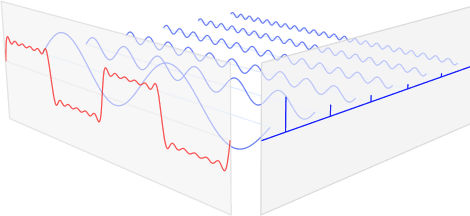

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

t = np.linspace(0, 0.5, 500)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)  # addition of two sine waves with 40Hz, 90Hz.

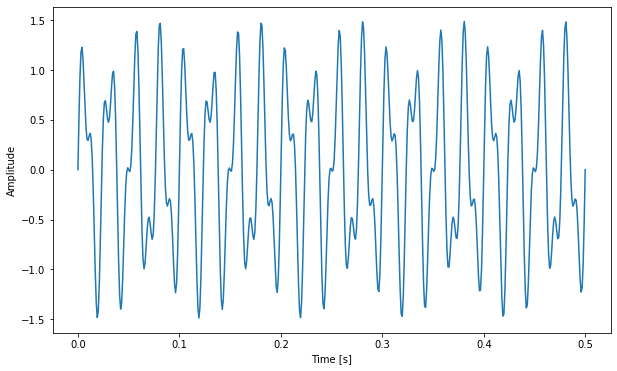

In [7]:
plt.figure(figsize=(10,6))
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

In [8]:
fft = np.fft.fft(s)

In [10]:
fft.shape

(500,)

In [14]:
fft[:6]

array([4.44089210e-14+0.j        , 3.80483493e-04-0.06055503j,
       1.53177148e-03-0.12188809j, 3.48410350e-03-0.18481554j,
       6.29040694e-03-0.25023464j, 1.00304815e-02-0.3191751j ])

In [15]:
for i in range(2):
    print("Value at index {}:\t{}".format(i, fft[i + 1]), "\nValue at index {}:\t{}".format(fft.size -1 - i, fft[-1 - i]))

Value at index 0:	(0.0003804834928392009-0.0605550317619008j) 
Value at index 499:	(0.00038048349284042216+0.0605550317619024j)
Value at index 1:	(0.001531771483137212-0.1218880852806952j) 
Value at index 498:	(0.0015317714831376839+0.12188808528069531j)


For real number inputs is $n$ the **complex conjugate** of $N - n$.

Because the second half of the sequence gives us no new information we can already conclude that the half of the FFT sequence is the output we need. The complex output numbers of the FFT contains the following information:

- **Amplitude** of a certain frequency sine wave (energy).
- **Phase** offset of a certain frequency sine wave.

#### Spectrum

We are interested in the energy of each frequency, so we can determine the absolute value of the FFT’s output. To get a good insight in the spectrum the energy should be plotted against the frequency. Each discrete number output of the FFT corresponds to a certain frequency. The frequency resolution is determined by:
$$ \Delta f = \frac{f_s}{N} $$

In [16]:
fft = np.fft.fft(s)
T = t[1] - t[0]  # sampling interval 
N = s.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

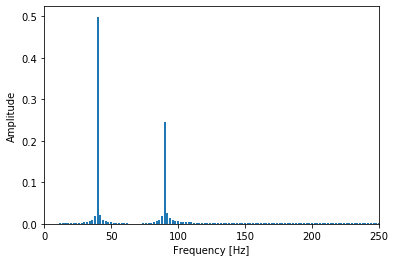

In [18]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.xlim(0,250)
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()